In [15]:
# FROM NOTES 2 (Page 1) - Downloading data
import pandas as pd
from urllib.request import urlretrieve

# Download Premier League data
url = 'https://www.football-data.co.uk/mmz4281/2324/E0.csv'
urlretrieve(url, 'premier_league.csv')
df = pd.read_csv('premier_league.csv')

In [16]:
# your_name_scraping.ipynb
import pandas as pd
from urllib.request import urlretrieve
import requests

# Download multiple seasons (like in notes)
seasons = ['2023', '2022', '2021', '2020']
data_frames = []

for season in seasons:
    url = f'https://www.football-data.co.uk/mmz4281/{season[-2:]}{int(season[-2:])+1}/E0.csv'
    print(f"Downloading {season}-{int(season)+1} season...")
    
    # Download and read
    filename = f'pl_{season}.csv'
    urlretrieve(url, filename)
    df = pd.read_csv(filename)
    df['Season'] = f"{season}-{int(season)+1}"
    data_frames.append(df)

# Combine all seasons
all_data = pd.concat(data_frames, ignore_index=True)
all_data.to_csv('premier_league_all_seasons.csv', index=False)
print(f"Total matches: {len(all_data)}")

Total matches: 1520


In [17]:
# Clean the data
# 1. Handle missing values
all_data = all_data.dropna(subset=['FTHG', 'FTAG', 'FTR'])

# 2. Convert date column
all_data['Date'] = pd.to_datetime(all_data['Date'], dayfirst=True)

# 3. Create new useful columns
all_data['TotalGoals'] = all_data['FTHG'] + all_data['FTAG']
all_data['GoalDifference'] = all_data['FTHG'] - all_data['FTAG']
all_data['HomeWin'] = (all_data['FTR'] == 'H').astype(int)
all_data['AwayWin'] = (all_data['FTR'] == 'A').astype(int)
all_data['Draw'] = (all_data['FTR'] == 'D').astype(int)

print("Data cleaned and saved!")
all_data.to_csv('cleaned_football_data.csv', index=False)

Data cleaned and saved!


In [18]:
# Analysis 1: Home advantage
home_win_rate = all_data['HomeWin'].mean() * 100
away_win_rate = all_data['AwayWin'].mean() * 100
draw_rate = all_data['Draw'].mean() * 100

# Analysis 2: Goals per season
goals_by_season = all_data.groupby('Season')['TotalGoals'].agg(['sum', 'mean', 'count'])

# Analysis 3: Top performing teams
home_wins = all_data.groupby('HomeTeam')['HomeWin'].sum()
away_wins = all_data.groupby('AwayTeam')['AwayWin'].sum()
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

=== ANALYSIS 1: Home Advantage ===
Home Win Rate: 43.8%
Away Win Rate: 33.8%
Draw Rate: 22.4%


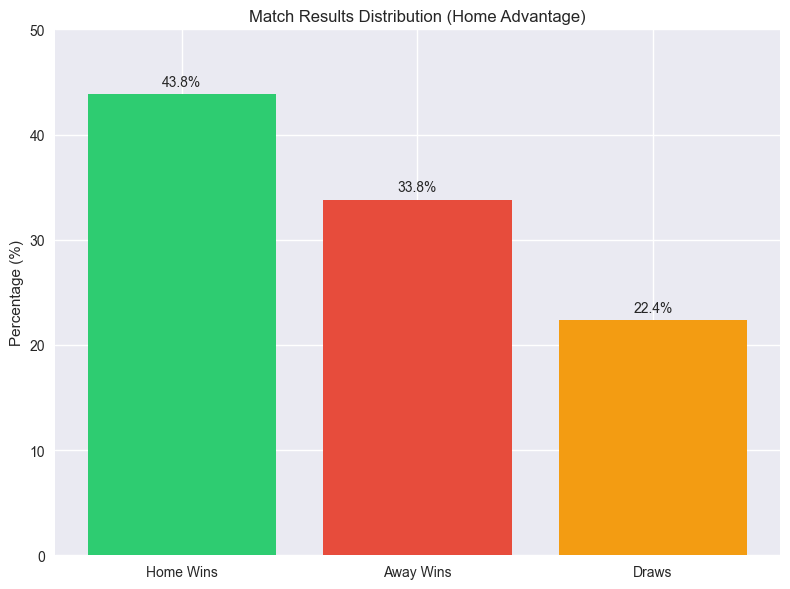


=== ANALYSIS 2: Goals Per Season ===
            sum      mean  count
Season                          
2020-2021  1024  2.694737    380
2021-2022  1071  2.818421    380
2022-2023  1084  2.852632    380
2023-2024  1246  3.278947    380


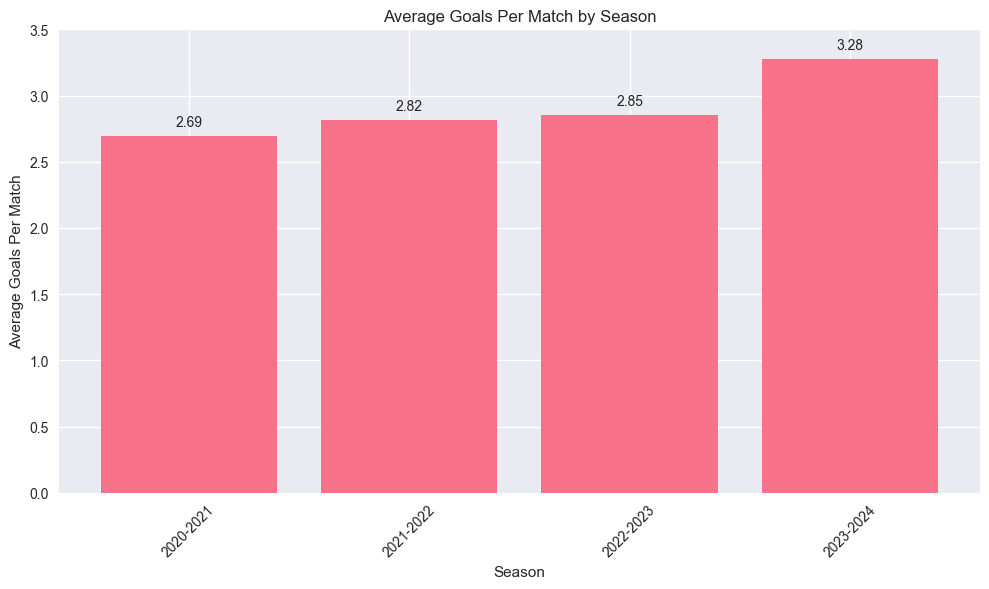


=== ANALYSIS 3: Top Performing Teams ===
Top 10 Teams by Total Wins:
1. Man City: 112 wins
2. Arsenal: 94 wins
3. Liverpool: 91 wins
4. Man United: 78 wins
5. Tottenham: 78 wins
6. Chelsea: 69 wins
7. Aston Villa: 67 wins
8. Newcastle: 62 wins
9. West Ham: 60 wins
10. Brighton: 51 wins


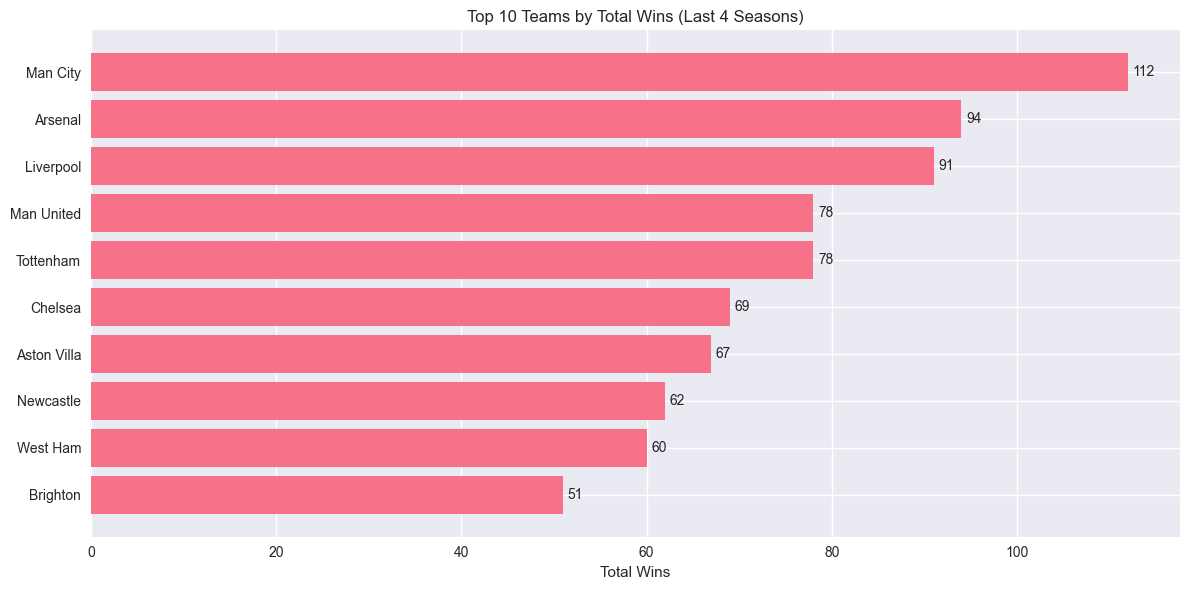


=== EXTRA ANALYSIS: Goal Distribution ===
Average goals per match: 2.91
Most common scoreline: 2 total goals


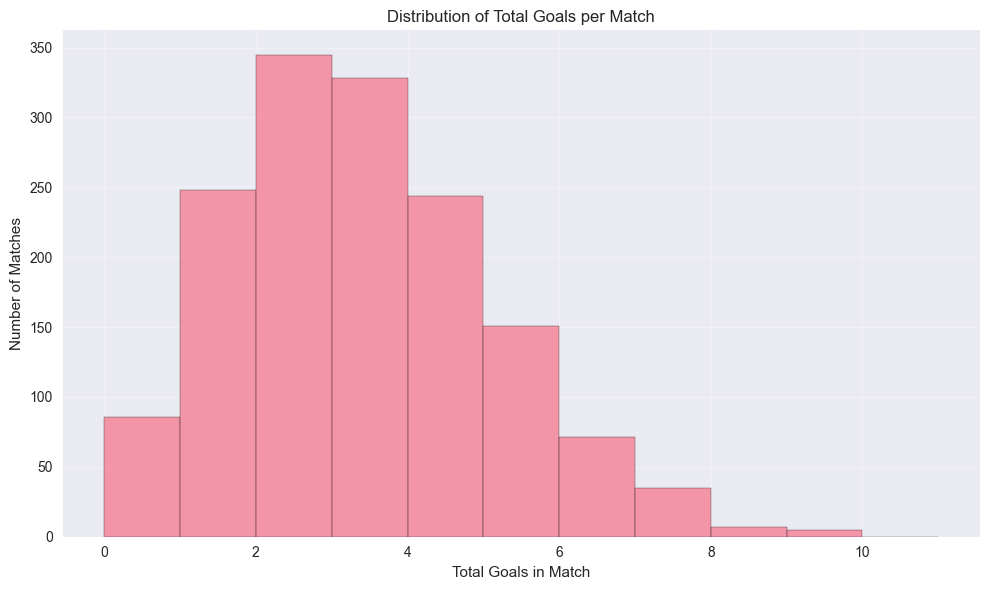

In [19]:
# Add this to your scraping.ipynb after the analysis code

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ---------- ANALYSIS 1: Home Advantage ----------
print("=== ANALYSIS 1: Home Advantage ===")
print(f"Home Win Rate: {home_win_rate:.1f}%")
print(f"Away Win Rate: {away_win_rate:.1f}%")
print(f"Draw Rate: {draw_rate:.1f}%")

# Visualization
fig1, ax1 = plt.subplots(figsize=(8, 6))
results = ['Home Wins', 'Away Wins', 'Draws']
percentages = [home_win_rate, away_win_rate, draw_rate]
colors = ['#2ecc71', '#e74c3c', '#f39c12']

bars = ax1.bar(results, percentages, color=colors)
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Match Results Distribution (Home Advantage)')
ax1.set_ylim(0, 50)

# Add value labels on bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('home_advantage.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- ANALYSIS 2: Goals Trends ----------
print("\n=== ANALYSIS 2: Goals Per Season ===")
print(goals_by_season)

fig2, ax2 = plt.subplots(figsize=(10, 6))
seasons = goals_by_season.index
avg_goals = goals_by_season['mean']

bars = ax2.bar(seasons, avg_goals)
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Goals Per Match')
ax2.set_title('Average Goals Per Match by Season')
ax2.set_ylim(0, 3.5)

# Add value labels
for bar, avg in zip(bars, avg_goals):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{avg:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('goals_by_season.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- ANALYSIS 3: Top Teams ----------
print("\n=== ANALYSIS 3: Top Performing Teams ===")
top_10_teams = total_wins.head(10)
print("Top 10 Teams by Total Wins:")
for i, (team, wins) in enumerate(top_10_teams.items(), 1):
    print(f"{i}. {team}: {wins} wins")

fig3, ax3 = plt.subplots(figsize=(12, 6))
teams = top_10_teams.index
wins = top_10_teams.values

bars = ax3.barh(teams[::-1], wins[::-1])  # Reverse for highest on top
ax3.set_xlabel('Total Wins')
ax3.set_title('Top 10 Teams by Total Wins (Last 4 Seasons)')

# Add value labels
for i, (team, win_count) in enumerate(zip(teams[::-1], wins[::-1])):
    ax3.text(win_count + 0.5, i, f'{win_count}', va='center')

plt.tight_layout()
plt.savefig('top_teams.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------- EXTRA: Goal Distribution ----------
print("\n=== EXTRA ANALYSIS: Goal Distribution ===")
print(f"Average goals per match: {all_data['TotalGoals'].mean():.2f}")
print(f"Most common scoreline: {all_data['TotalGoals'].mode().values[0]} total goals")

fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.hist(all_data['TotalGoals'], bins=range(0, 12), edgecolor='black', alpha=0.7)
ax4.set_xlabel('Total Goals in Match')
ax4.set_ylabel('Number of Matches')
ax4.set_title('Distribution of Total Goals per Match')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('goal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()